# Lab1 Datahantering - Covid-19

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import datetime
import warnings
warnings.filterwarnings(category=FutureWarning, action="ignore")
warnings.filterwarnings(category=UserWarning, action="ignore")

### Uppgift 1:
- Read in "Veckodata Riket" sheet in Excel file.

In [20]:
covid = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name='Veckodata Riket')

#### Uppgift 1a:
- Doing initial analysis of the dataset:
- .head(), .info, .info(), .describe, shape() etc

In [21]:
covid.head(10)

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.000000,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.000000,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.000000,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.000000,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.000000,0,0.000000
5,2020,11,838,8,10,1063,10,16,19,5,0.500000,5,0.500000
6,2020,12,924,9,17,1987,19,88,107,44,4.300000,49,4.700000
7,2020,13,1957,19,28,3944,38,238,345,190,18.400000,239,23.100000
8,2020,14,3229,31,50,7173,69,277,622,451,43.700001,690,66.800003
9,2020,15,3740,36,67,10913,106,289,911,664,64.300003,1354,131.100006


covid.info():
- Man kan se att det inte finns NaN's.

In [22]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [23]:
covid.describe

<bound method NDFrame.describe of        år  veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
0    2020            6                 1                           0   
1    2020            7                 0                           0   
2    2020            8                 0                           0   
3    2020            9                13                           0   
4    2020           10               211                           2   
..    ...          ...               ...                         ...   
137  2022           38              4669                          45   
138  2022           39             13532                         130   
139  2022           40              3999                          39   
140  2022           41              3408                          33   
141  2022           42              3279                          32   

     Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
0                           

In [24]:
rows, cols = covid.shape
print(f'Number of rows: {rows}\nNumber of cols: {cols}')

Number of rows: 142
Number of cols: 13


In [25]:
covid.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [26]:
covid.index

RangeIndex(start=0, stop=142, step=1)

#### Uppgift 1b:
- Slår ihop kolumnerna år och veckonummer till en kolumn med formatet 'ÅÅÅÅvVV'.
- Castar till 'str' för att kunna göra detta.
- För att göra texten i senare grafer snyggare, döper jag om vissa kolumner.

In [121]:
covid['år'] = covid['år'].astype(str)
covid['veckonummer'] = covid['veckonummer'].astype(str)
covid['Vecka'] = covid['år'] + "v" + covid['veckonummer']

# castar 'år' och 'veckonummer' till dtype 'int'
covid['år'] = covid['år'].astype(int)
covid['veckonummer'] = covid['veckonummer'].astype(int)

# döper om valda kolumner
covid.rename(columns={'Antal_fall_vecka':'Antal fall per vecka','Antal_avlidna_vecka':'Antal avlidna per vecka'}, inplace=True)

covid.head()

,år,veckonummer,Antal fall per vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal avlidna per vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0,2020v9
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0,2020v10


#### Uppgift 1c
- Linjediagram med antal avlidna per vecka. Seaborn och Plotly Express.
- x-axeln: för tydlighets skull, tar bara med vad 12'e label på x-axeln.

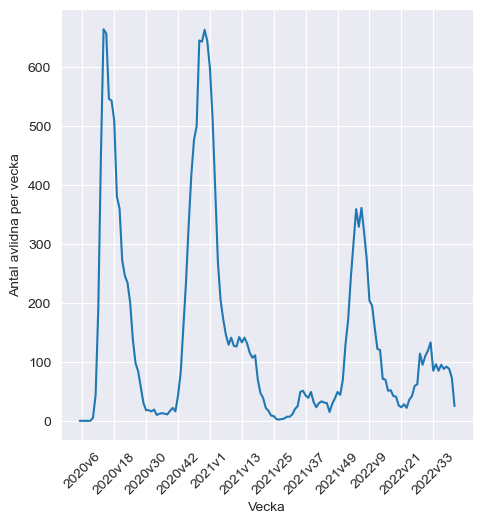

In [123]:
# 1c Seaborn:
fig = sns.relplot(x='Vecka', y='Antal avlidna per vecka', kind='line', data=covid)
loc, labels = plt.xticks()
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)
fig.savefig("Visualiseringar/1c_antal_avlidna_per_vecka.png")

In [142]:
# 1c, Plotly Express:
fig = px.line(covid, x='Vecka', y='Antal avlidna per vecka', title='1c: Antal avlidna per vecka, hela Sverige')
fig.show()
fig.write_html('Visualiseringar/1c_antal_avlidna_per_vecka.html')

#### Uppgift 1d:
- d: Linjediagram med antal fall per vecka.

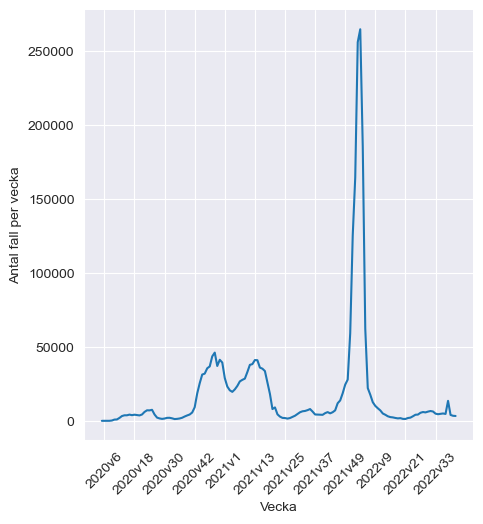

In [129]:
# 1d Seaborn
fig = sns.relplot(x='Vecka', y='Antal fall per vecka', kind='line', data=covid)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)
fig.savefig("Visualiseringar/1d_antal_fall_per_vecka.png")

In [143]:
# 1d Plotly Express
fig = px.line(covid, x='Vecka', y='Antal fall per vecka', title='1d: Antal fall per vecka, hela Sverige')
fig.show()
fig.write_html("Visualiseringar/1d_antal_fall_per_vecka.html")

#### Uppgift 1e
- Linjediagram med antal avlidna per vecka och antal fall per vecka.

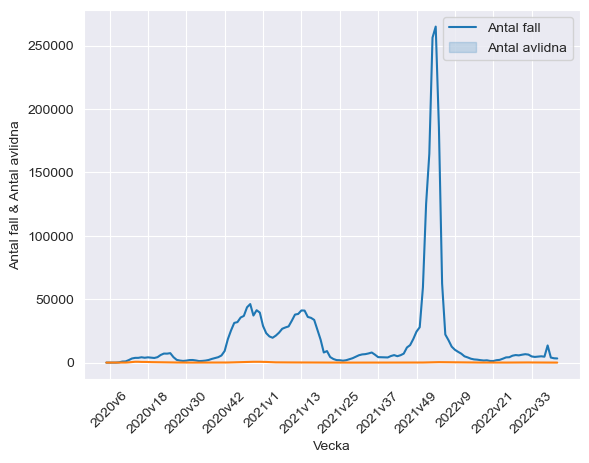

In [141]:
# 1e Seaborn
sns.lineplot(x='Vecka', y='Antal fall per vecka', data=covid)
sns.lineplot(x='Vecka', y='Antal avlidna per vecka', data=covid)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)
plt.ylabel('Antal fall & Antal avlidna')
plt.legend(['Antal fall','Antal avlidna'])
plt.savefig("Visualiseringar/2d_antal_avlidna_o_fall_per_vecka.png")

In [33]:
# 1e Plotly Express:
x=covid['Vecka']
y1=covid['Antal_avlidna_vecka']
y2=covid['Antal_fall_vecka']

fig = px.line(covid, x=x, y=y1, title='1e: Antal avlidna och antal fall per vecka, hela Sverige.')
fig.add_scatter(x=x, y=y2, yaxis='y2', mode='lines')
fig.update_layout(yaxis2=dict(overlaying="y", side="right"))
fig.show()

#### Uppgift 1f
- Kumulativt antal smittade.

([<matplotlib.axis.XTick at 0x24b4345fb90>,
 [Text(1, 0, '2020v6'),
  Text(13, 0, '2020v18'),
  Text(25, 0, '2020v30'),
  Text(37, 0, '2020v42'),
  Text(49, 0, '2021v1'),
  Text(61, 0, '2021v13'),
  Text(73, 0, '2021v25'),
  Text(85, 0, '2021v37'),
  Text(97, 0, '2021v49'),
  Text(109, 0, '2022v9'),
  Text(121, 0, '2022v21'),
  Text(133, 0, '2022v33')])

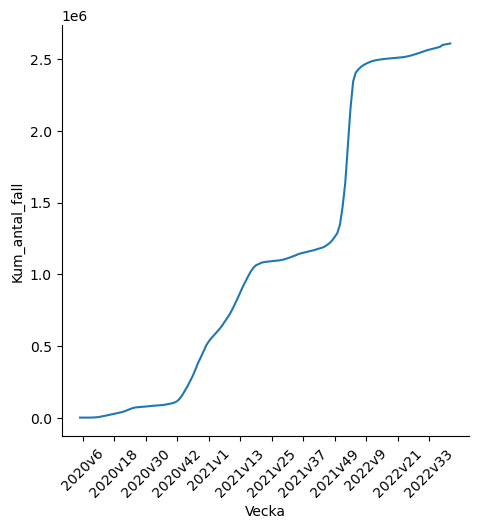

In [34]:
# 1f Seaborn
sns.relplot(x='Vecka', y='Kum_antal_fall', kind='line',data=covid)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)

In [35]:
# 1f Plotly Express
px.line(covid, x='Vecka', y='Kum_antal_fall')

#### Uppgift 2
- Läser in datasetet "Folkhalsomyndigheten_Covid19_Vaccine.xlsx" flik "Vaccinerade kommun och ålder" med vaccin data och tittar lite översiktligt på det.

In [36]:
vaccin = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")

In [37]:
vaccin.head(3)

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN


In [38]:
vaccin.columns

Index(['Län', 'Län_namn', 'Kommun', 'Kommun_namn', 'Ålder', 'Befolkning',
       'Antal minst 1 dos', 'Antal minst 2 doser', 'Antal 3 doser',
       'Antal 4 doser', 'Andel minst 1 dos', 'Andel minst 2 doser',
       'Andel 3 doser', 'Andel 4 doser'],
      dtype='object')

Kollar vilka län som finns representerade i "Län_namn" kolumnen.

In [39]:
vaccin['Län_namn'].unique()

array(['Stockholms län', 'Uppsala län', 'Södermanlands län',
       'Östergötlands län', 'Jönköpings län', 'Kronobergs län',
       'Kalmar län', 'Gotlands län', 'Blekinge län', 'Skåne län',
       'Hallands län', 'Västra Götalands län', 'Värmlands län',
       'Örebro län', 'Västmanlands län', 'Dalarnas län', 'Gävleborgs län',
       'Västernorrlands län', 'Jämtlands län', 'Västerbottens län',
       'Norrbottens län'], dtype=object)

#### Uppgift 2a
- Uppgift: Hur många unika län det finns i datasetet.
- Använder kolumnen "Län_namn", använder len() och unique() funktionerna.

In [40]:
antal_län = len(vaccin['Län_namn'].unique())
print(f'Det finns {antal_län} län i datasetet.')

Det finns 21 län i datasetet.


#### Uppgift 2b
- Uppgift: hur många kommuner det finns i datasetet.
- Använder len() och unique().

In [41]:
antal_kommuner = len(vaccin['Kommun_namn'].unique())
print(f'Det finns {antal_kommuner} kommuner i datasetet.')

Det finns 290 kommuner i datasetet.


#### Uppgift 2c
- Uppgift: Hur stor befolkning finns representerat i datasetet.

In [42]:
befolkning = vaccin['Befolkning'].sum()
formatted_befolkning = "{:,.0f}".format(befolkning)
print(f'Det är {formatted_befolkning} antal personer i datasetet.')
print(f'Det kan avrundas till {"{:,.1e}".format(round(befolkning,-5))} personer, för uppskattningar jag gör senare i labben.')

Det är 9,092,790 antal personer i datasetet.
Det kan avrundas till 9.1e+06 personer, för uppskattningar jag gör senare i labben.


#### Uppgift 2d
- Uppgift: Hur många under 18 år finns det i Sverige?
- I excel filen står att datan är från 27 oktober 2022.
- Kollar som första steg vilka åldrar som finns representerade i datasetet:

In [43]:
vaccin['Ålder'].unique()

array(['12-15', '16-17', '18-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80-89', '90 eller äldre'], dtype=object)

Slutsats: baserat på representerade åldrar, personer i åldern 0-11 år är inte med i datasetet.  
Jag vet också att Sveriges befolkning är cirka 10.5 miljoner, så enligt min uppsakattning saknas närmare 1.4 miljoner, i ålder 0-11 år (10.5 - 9.1 = 1.4). Men för att veta mer exakt hur många som saknas, får man leta upp aktuell statistik.

Beräknar antalet personer i åldern 12-17 år, som är representerade i datasetet:

In [44]:
age_12to17 = vaccin.query('Ålder == "12-15"| Ålder=="16-17"')['Befolkning'].sum()
print(f'Antalet personer i ålern 12-17 år, i datasetet, är {"{:,.0f}".format(age_12to17)}.')
print(f'För en uppskattning, kan det avrundas till {"{:,.0f}".format(round(age_12to17,-4))} personer.')

Antalet personer i ålern 12-17 år, i datasetet, är 745,370.
För en uppskattning, kan det avrundas till 750,000 personer.


- Jag har egen kunskap om att det bor totalt cirka 10.5 miljoner i Sverige. 
- Baserat på det kan jag uppskatta att det saknas cirka 1.4 milj personer i datasetet, och dessa är 0-11 år gamla.
- Baserat på datan har jag tagit reda på att antalet personer mellan 12 och 18 år är cirka 750.000. 
- Dvs, min uppskattning är att det finns cirka 2.15 miljoner (1.4 miljoner + 750.000) personer under 18 år i Sverige.
- För att bekräfta med statistik, så laddar jag in data från SCB. Det är samma data som vi använde på en lektion. Filen finns i repot.
- Bara genom att titta på head så kan jag se att totala befolkningen 31 dec 2022 var 10.52 miljoner, vilket är väldigt nära min uppskattning.
- I datan från SCB kan jag också läsa ut antalet personer 0-17 år är 2.19 miljoner.

In [45]:
scb_stat = pd.read_excel("../Data/be0101_tab8samdrag2022mar.xlsx", skiprows=3)
scb_stat.head()

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1986,1985,1984,1983,1982,1981,1980,1975,1970,1960
0,Folkmängd 31 december,10521556,10452326,10379295,10327589,10230185,10120242,9995153,9851017,9747355,...,8.381515e+06,8.358139e+06,8.342621e+06,8.330573e+06,8.327484e+06,8.323033e+06,8.317937e+06,8.208442e+06,8.081229e+06,7.497967e+06
1,Män,5298324,5260707,5222847,5195814,5142438,5082662,5013347,4930966,4872240,...,4.137513e+06,4.127110e+06,4.120549e+06,4.116137e+06,4.117357e+06,4.118622e+06,4.119822e+06,4.081263e+06,4.035911e+06,3.740119e+06
2,Kvinnor,5223232,5191619,5156448,5131775,5087747,5037580,4981806,4920051,4875115,...,4.244002e+06,4.231029e+06,4.222072e+06,4.214436e+06,4.210127e+06,4.204411e+06,4.198115e+06,4.127179e+06,4.045318e+06,3.757848e+06
3,Antal personer 0-17 år,2194785,2198240,2189403,2180508,2155379,2121598,2076407,2025077,1985282,...,1.836443e+06,1.844497e+06,1.865377e+06,1.893161e+06,1.925186e+06,1.956842e+06,1.977226e+06,2.012638e+06,2.007012e+06,2.046306e+06
4,Personer 0-17 år i % av hela befolkningen,20.9,21,21.1,21.1,21.1,21,20.8,20.6,20.4,...,2.191063e+01,2.206827e+01,2.235960e+01,2.272546e+01,2.311846e+01,2.351116e+01,2.377063e+01,2.451912e+01,2.483548e+01,2.729148e+01


Läser också ut antalet personer ur den inlästa DataFramen:

In [46]:
bef_2022 = scb_stat.set_index("Unnamed: 0").loc['Folkmängd 31 december', 2022] # sätter kolumnen "Unnamed: 0" till index.
print(f'31 dec 2022 bor det {"{:,.0f}".format(bef_2022)} personer i Sverige, enligt statistik från SCB.')

31 dec 2022 bor det 10,521,556 personer i Sverige, enligt statistik från SCB.


Läser också ut antalet personer 0-17 år från inlästa DataFramen:

In [47]:
age_0to17 = scb_stat.set_index("Unnamed: 0").loc['Antal personer 0-17 år', 2022] # sätter kolumnen "Unnamed: 0" till index.
print(f'31 dec 2022 bor det {"{:,.0f}".format(age_0to17)} personer 0-17 år gamla i Sverige, enligt statistik från SCB.')

31 dec 2022 bor det 2,194,785 personer 0-17 år gamla i Sverige, enligt statistik från SCB.


#### Uppgift 2e
- Uppgift: Rita ett diagram som visar åldersfördelningen i Sverige.
- Använder groupby() på ålder, vilket delar upp datasetet per de ålderskategorier som finns i datasetet. Sedan kan jag beräkna anatalet individer per åldersgrupp.

In [48]:
population_groupby_age = vaccin.groupby('Ålder')
age_cat = population_groupby_age.groups.keys()
print(age_cat)


dict_keys(['12-15', '16-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90 eller äldre'])


För att kunna plotta den, så skapar jag en DataFrame baserat på Serien.

In [49]:
PDseries_to_plot = population_groupby_age['Befolkning'].sum()
df_to_plot = pd.DataFrame({'Ålder':PDseries_to_plot.index,'Befolkning':PDseries_to_plot.values})
df_to_plot.head(10)

,Ålder,Befolkning
0,12-15,503831
1,16-17,241539
2,18-29,1475950
3,30-39,1467590
4,40-49,1298156
5,50-59,1339798
6,60-69,1121922
7,70-79,1033113
8,80-89,496750
9,90 eller äldre,114141


Plan: Jag skapar en Pandas DataFrame för åldern 0-11 år. Beräknar antalet i den kategorin med kunskap från tidigare.

In [50]:
age_0to11 = age_0to17 - age_12to17
print(f'Antalet personer mellan 0-11 år är {"{:,.0f}".format(age_0to11)}.')

Antalet personer mellan 0-11 år är 1,449,415.


Skapar Pandas DF.

In [51]:
df_age_0to11 = pd.DataFrame({'Ålder':['0-11'],'Befolkning':[age_0to11]})
df_age_0to11.head()

,Ålder,Befolkning
0,0-11,1449415


Concatenerar ihop DF'arna:

In [52]:
result = pd.concat([df_age_0to11,df_to_plot], ignore_index=True)
result.head(10)

,Ålder,Befolkning
0,0-11,1449415
1,12-15,503831
2,16-17,241539
3,18-29,1475950
4,30-39,1467590
5,40-49,1298156
6,50-59,1339798
7,60-69,1121922
8,70-79,1033113
9,80-89,496750


Plottar i Plotly Express.

In [103]:
fig = px.histogram(result, x='Ålder', y='Befolkning', title="Uppg. 2e: Sveriges Befolknings åldersfördelning.")
fig.show()
fig.write_html("Visualiseringar/2e_åldersfördelning.html")

#### Uppgift 2f
- Uppgift: Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per län.
- Plan: groupby() på 'Län_namn'. Det finns en 'andel' kolumn i datasetet, men den går inte att använda här. Måste beräkna en egen, gör det baserat på total befolkning och antal som fått olika vaccin. 

In [54]:
gbdf_county = vaccin.groupby('Län_namn')
min_1_shot = gbdf_county['Antal minst 1 dos'].sum()/gbdf_county['Befolkning'].sum() # Serie
min_2_shot = gbdf_county['Antal minst 2 doser'].sum()/gbdf_county['Befolkning'].sum() # Serie
min_3_shot = gbdf_county['Antal 3 doser'].sum()/gbdf_county['Befolkning'].sum() # Serie
min_1_shot_toplot = pd.DataFrame({'Län_namn': min_1_shot.index, 'Andel_minst_1_dos':min_1_shot.values, 'Andel minst 2 doser': min_2_shot.values, 'Andel 3 doser': min_3_shot})

In [104]:
fig = px.bar(min_1_shot_toplot, x='Län_namn', y=['Andel_minst_1_dos','Andel minst 2 doser','Andel 3 doser'], barmode='group', title='Andel av befolkningen med minst 1 dos, minst 2 doser och 3 doser, per län.')
fig.show()
fig.write_html("Visualiseringar/2f_andel_1_2_3_doser_per_län.html")

#### Uppgift 2f
- Uppgift: Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos,två doser, tre doser och fyra doser.
- Plan: jag återanvänder så mycket som möjligt av tidigare jobb.

In [106]:
min_4_shot = gbdf_county['Antal 4 doser'].sum()/gbdf_county['Befolkning'].sum() # Serie
four_shot_toplot = pd.DataFrame({'Län_namn': min_1_shot.index, 'Andel_minst_1_dos':min_1_shot.values, 'Andel minst 2 doser': min_2_shot.values, 'Andel 3 doser': min_3_shot, 'Andel 4 doser': min_4_shot})
four_shot_toplot.head(22)
# tar ut endast Västra Götaland och Stockholm:
fig = px.bar(four_shot_toplot.loc[['Västra Götalands län','Stockholms län']], x='Län_namn', y=['Andel_minst_1_dos','Andel minst 2 doser','Andel 3 doser','Andel 4 doser'], barmode='group')
fig.show()
fig.write_html("2f_västragötaland_stockholm_1234_doser")


#### Uppgift 3
- Uppgift: Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på flera sheets på båda Excel-filerna. Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla visualiseringar.

##### KPI nr 1:
- Ungefärlig andel av befolkningen, per åldersgrupp, som avled, baserat på FHM data och SCB befolkningsdata

##### KPI nr 2:
- Andel av befolkningen, per åldersgrupp, som drabbades av Covid-19.

##### KPI nr 3:
- Andel av befolkningen, per åldersgrupp, som intensivvårdades.

##### KPI nr 4:
- Kumulativt antal vaccinationer i hela Sverige över tid.

##### KPI nr 4:
- 

##### :
- Animering som visar hur antalet vaccinationer öker iom att vaccineringen kommer igång. Använder sheet "Antal vaccinationer". Kanske inte riktigt ett KPI, men ändå intressant tycker jag.

##### 4:
- Totalt antal fall per 100_000 i göteborgs alla stadsdelar, 22w42, eller en animering?

#### KPI #1
- Jag laddar ner statistik från SCB om antalet personer som finns i varje åldersgrupp, i form av en .csv-fil. [Länk SCB](https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/befolkningspyramid-for-sverige/#Senaste_aret)
- Jag vill använda datan på antalet avlidna per åldersgrupp (sheet "Totalt antal per åldersgrupp"), samt datan från SCB på totala antalet individer i varje åldersgrupp, för att uppskatta hur stor andel i varje åldersgrupp som avled.
- Detta blir en uppskattning endast, men ändå rätt så bra precision.

In [57]:
# Läser in datan jag laddade ner från SCB:
scb = pd.read_csv("../Data/BE0101N1.csv", encoding='latin-1')
scb.head(15)

,region,ålder,kön,2022
0,00 Riket,0-4 år,män,296183
1,00 Riket,0-4 år,kvinnor,280184
2,00 Riket,5-9 år,män,319820
3,00 Riket,5-9 år,kvinnor,301335
4,00 Riket,10-14 år,män,325003
5,00 Riket,10-14 år,kvinnor,306568
6,00 Riket,15-19 år,män,310539
7,00 Riket,15-19 år,kvinnor,292308
8,00 Riket,20-24 år,män,310354
9,00 Riket,20-24 år,kvinnor,275136


Eftersom datan från SCB är i 0-4 år, 5-9 år, osv, så måste jag göra om den för att kunna jämföra med datan från FHM. Jag gör om SCB datan till samma format som FHM-datan (0-9, 10-19 osv) samt slår ihop kvinnor och män, detta i en ny DataFrame.

In [58]:
dfgb_scb = scb.groupby('ålder')

age_groups = ['0-9 år',
              '10-19 år',
              '20-29 år',
              '30-39 år',
              '40-49 år',
              '50-59 år',
              '60-69 år',
              '70-79 år',
              '80-89 år',
              'över 90 år']

befolkning = [dfgb_scb['2022'].sum()['0-4 år']+dfgb_scb['2022'].sum()['5-9 år'],
              dfgb_scb['2022'].sum()['10-14 år']+dfgb_scb['2022'].sum()['15-19 år'],
              dfgb_scb['2022'].sum()['20-24 år']+dfgb_scb['2022'].sum()['25-29 år'],
              dfgb_scb['2022'].sum()['30-34 år']+dfgb_scb['2022'].sum()['35-39 år'],
              dfgb_scb['2022'].sum()['40-44 år']+dfgb_scb['2022'].sum()['45-49 år'],
              dfgb_scb['2022'].sum()['50-54 år']+dfgb_scb['2022'].sum()['55-59 år'],
              dfgb_scb['2022'].sum()['60-64 år']+dfgb_scb['2022'].sum()['65-69 år'],
              dfgb_scb['2022'].sum()['70-74 år']+dfgb_scb['2022'].sum()['75-79 år'],
              dfgb_scb['2022'].sum()['80-84 år']+dfgb_scb['2022'].sum()['85-89 år'],
              dfgb_scb['2022'].sum()['90-94 år']+dfgb_scb['2022'].sum()['95-99 år']+dfgb_scb['2022'].sum()['100+ år']
              
]
df_scb_fixed = pd.DataFrame({'ålder':age_groups,'befolkning':befolkning})
df_scb_fixed.head(10)


,ålder,befolkning
0,0-9 år,1197522
1,10-19 år,1234418
2,20-29 år,1252142
3,30-39 år,1475316
4,40-49 år,1300726
5,50-59 år,1339203
6,60-69 år,1117832
7,70-79 år,1022050
8,80-89 år,480284
9,över 90 år,102063


Plan: Jag adderar 1. 'antalet fall' och 2. 'antalet avlidna', per åldergrupp. Den datan finns i FHM filen "Folkhalsomyndigheten_Covid19.xlsx" i fliken "Totalt antal per åldersgrupp". Först läser jag in datan, från FHM, till en DataFrame. Sedan kopierar jag den relevanta kolumnen till SCB-datan. Efter jag läst in filen, så tar jag bort en rad som innehåller "Uppgit saknas", som inte fyller någon funktion. Nedan beskriver hur jag gör.

In [59]:
# Read in FHM data
df_fhm = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name='Totalt antal per åldersgrupp')
df_fhm.drop(index=10, inplace=True)
df_fhm.head(10)

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Ålder_0_9,138071,109,17
1,Ålder_10_19,355823,101,9
2,Ålder_20_29,418506,285,41
3,Ålder_30_39,493443,492,71
4,Ålder_40_49,474702,997,172
5,Ålder_50_59,378468,1932,523
6,Ålder_60_69,180079,2595,1422
7,Ålder_70_79,87096,2394,4654
8,Ålder_80_89,58170,612,8326
9,Ålder_90_plus,26677,21,5420


Kombinerar data från SCB och FHM, i en ny dataframe som jag kallar 'df_scb_fhm'.  
Byter namn på kolumn 'ålder' till 'Åldersgrupp'.  
Beräknar också mina KPI'er (KPI #1, #2 och #3).

In [82]:
df_scb_fhm = df_scb_fixed.copy()
#df_scb_fhm.head()
df_scb_fhm['totalt_antal_fall'] = df_fhm['Totalt_antal_fall']
df_scb_fhm['totalt_antal_intensivvårdade'] = df_fhm['Totalt_antal_intensivvårdade']
df_scb_fhm['totalt_antal_avlidna'] = df_fhm['Totalt_antal_avlidna']
# Beräknar mina KPI'er
df_scb_fhm['Andel fall'] = df_scb_fhm['totalt_antal_fall'] / df_scb_fhm['befolkning'] #KPI #2
df_scb_fhm['Andel avlidna'] = df_scb_fhm['totalt_antal_avlidna'] / df_scb_fhm['befolkning'] #KPI #1
df_scb_fhm['Andel intensivvårdade'] = df_scb_fhm['totalt_antal_intensivvårdade'] / df_scb_fhm['befolkning'] #KPI #3
df_scb_fhm.rename(columns={'ålder':'Åldersgrupp'}, inplace=True)
df_scb_fhm.head(10)


,Åldersgrupp,befolkning,totalt_antal_fall,totalt_antal_intensivvårdade,totalt_antal_avlidna,Andel fall,Andel avlidna,Andel intensivvårdade
0,0-9 år,1197522,138071,109,17,0.115297,0.000014,0.000091
1,10-19 år,1234418,355823,101,9,0.288252,0.000007,0.000082
2,20-29 år,1252142,418506,285,41,0.334232,0.000033,0.000228
3,30-39 år,1475316,493443,492,71,0.334466,0.000048,0.000333
4,40-49 år,1300726,474702,997,172,0.364952,0.000132,0.000766
5,50-59 år,1339203,378468,1932,523,0.282607,0.000391,0.001443
6,60-69 år,1117832,180079,2595,1422,0.161097,0.001272,0.002321
7,70-79 år,1022050,87096,2394,4654,0.085217,0.004554,0.002342
8,80-89 år,480284,58170,612,8326,0.121116,0.017336,0.001274
9,över 90 år,102063,26677,21,5420,0.261378,0.053104,0.000206


KPI #1: Plottar med Plotly Express, andelen i varje ålderkategori som avled i Covid-19.

In [96]:
fig = px.bar(df_scb_fhm, x='Åldersgrupp', y='Andel avlidna', title="KPI #1a: Estimering av andel per åldersgrupp, som avled i Covid-19.")
fig.show()
fig.write_html("Visualiseringar/KPI_1a_estim_andel_avlidna.html")

In [97]:
fig = px.bar(df_scb_fhm, x='Åldersgrupp', y='Andel avlidna', log_y=True, title="KPI #1b: Estimering av andel per åldersgrupp, som avled i Covid-19. (Observera logaritmisk y-axel)")
fig.show()
fig.write_html("Visualiseringar/KPI_1b_andel_avlidna_logy.html")

KPI #2: Plottar med Plotly Express, andelen i varje ålderkategori som konstaterades smittad av Covid-19.

In [98]:
fig = px.bar(df_scb_fhm, x='Åldersgrupp', y='Andel fall', title="KPI #2: Andel konstaterade fall i Covid-19 per åldersgrupp, hela Sverige.")
fig.show()
fig.write_html("Visualiseringar/KPI_2_andel_fall.html")

KPI #3: Andel intensivvårdade per ålderskategori.

In [99]:
fig = px.bar(df_scb_fhm, x='Åldersgrupp', y='Andel intensivvårdade', title="Andel intensivvårdade per åldersgrupp, hela Sverige")
fig.show()
fig.write_html("Visualiseringar/KPI_3_andel_intensivvårdade.html")

KPI #4: Accumulerat antal vaccinationer över tid. I syfte att se hur den ökade, från och med den tiden då det började finnas vaccin, slutet av 2020.
- Data från filen "Folkhalsomyndigheten_Covid19_Vaccine.xlsx", fliken "Vaccinationer tidsserie".
- Skapar en ny kolumn, med kombinerat år och vecka, som jag sedan gör om till **datetime** format, kolumn 'Datum'. Helst hade jag velat ha den som "YYYY-WW" men det verkar inte gå. Adderar en dag ( + '1') och låter ett datum representera hela veckan.
- Plottar i Plotly Express.

In [89]:
# Read in data:
fhm_vaccine = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinationer tidsserie")
fhm_vaccine['År'] = fhm_vaccine['År'].astype(str)
fhm_vaccine['Vecka'] = fhm_vaccine['Vecka'].astype(str)
fhm_vaccine['år_vecka'] = fhm_vaccine['År'] + "-" + fhm_vaccine['Vecka']
fhm_vaccine['År'] = fhm_vaccine['År'].astype(int)
fhm_vaccine['Vecka'] = fhm_vaccine['Vecka'].astype(int)
fhm_vaccine['Datum'] = pd.to_datetime(fhm_vaccine['år_vecka'] + '1', format='%G-%V%u')
fhm_vaccine.sample(10)

,Vecka,År,Region,Antal vaccinationer,år_vecka,Datum
95,3,2021,Kalmar,8490,2021-3,2021-01-18
1376,9,2022,Västra Götaland,3380852,2022-9,2022-02-28
974,43,2021,Kronoberg,279203,2021-43,2021-10-25
1338,7,2022,Västernorrland,512619,2022-7,2022-02-14
2059,40,2022,Värmland,754048,2022-40,2022-10-03
94,3,2021,Kronoberg,4616,2021-3,2021-01-18
435,18,2021,Gävleborg,141135,2021-18,2021-05-03
551,24,2021,Stockholm,1565149,2021-24,2021-06-14
1788,28,2022,Kronoberg,435208,2022-28,2022-07-11
1880,32,2022,Skåne,2897422,2022-32,2022-08-08


Plottar antal vaccinationer per vecka, i Sverige totalt.
- Gör klart denna. Skapa en ny dataframe med bara sverige, sedan kolla om man kan göra något med date/time, för att få ordning på veckorna.
- Lägg till i samma plot, en bar med antal vaccinationer den veckan.

In [100]:
fig = px.line(fhm_vaccine[fhm_vaccine['Region'] == "| Sverige |"], x='Datum', y='Antal vaccinationer', title="KPI #4: Accumulerat antal vaccinationer, hela Sverige.")
fig.show()
fig.write_html("Visualiseringar/KPI_4_acc_antal_vaccinationer.html")

##### KPI #5: Accumulerat andelen av befolkningen i Sverige som har 1 respektive 2 doser vaccin, över tid.
- Data från filen "Folkhalsomyndigheten_Covid19_Vaccine.xlsx", fliken "Vaccinerade tidsserie".
- Tanken var ju att man skulle ta en dos 1 och efter cirka 6 veckor (?) ta sin andra dos.

In [91]:
# Läser in datan, adderar kolumn YYYY-WW som jag gör om till datetime format.
fhm_vaccinated = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade tidsserie")
fhm_vaccinated['År'] = fhm_vaccinated['År'].astype(str)
fhm_vaccinated['Vecka'] = fhm_vaccinated['Vecka'].astype(str)
fhm_vaccinated['år_vecka'] = fhm_vaccinated['År'] + "-" + fhm_vaccinated['Vecka']
fhm_vaccinated['År'] = fhm_vaccine['År'].astype(int)
fhm_vaccinated['Vecka'] = fhm_vaccine['Vecka'].astype(int)
fhm_vaccinated['Datum'] = pd.to_datetime(fhm_vaccinated['år_vecka'] + '1', format='%G-%V%u')
fhm_vaccinated.sample(10)

,Vecka,År,Region,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus,år_vecka,Datum
704,31.0,2021.0,| Sverige |,1913842,0.210479,Minst 1 dos,2021-15,2021-04-12
3053,NaN,NaN,Gotland,47780,0.886062,Minst 2 doser,2022-16,2022-04-18
1959,36.0,2022.0,Halland,231586,0.783277,Minst 2 doser,2021-43,2021-10-25
3515,NaN,NaN,Jämtland,100400,0.870032,Minst 2 doser,2022-26,2022-06-27
3523,NaN,NaN,Stockholm,1672986,0.798668,Minst 2 doser,2022-27,2022-07-04
3316,NaN,NaN,Gotland,48683,0.902808,Minst 1 dos,2022-22,2022-05-30
3256,NaN,NaN,| Sverige |,7789531,0.856671,Minst 1 dos,2022-21,2022-05-23
113,4.0,2021.0,Västra Götaland,0,0.000000,Minst 2 doser,2021-1,2021-01-04
2890,NaN,NaN,Västmanland,207767,0.856312,Minst 1 dos,2022-12,2022-03-21
3126,NaN,NaN,Stockholm,1732706,0.827177,Minst 1 dos,2022-18,2022-05-02


In [92]:
fhm_vaccinated_swe = fhm_vaccinated[fhm_vaccinated['Region'] == '| Sverige |']
fhm_vaccinated_swe.shape

(192, 8)

In [93]:
dfgp_obj = fhm_vaccinated_swe.groupby('Vaccinationsstatus')
dfgp_obj.groups.keys()

dict_keys(['Minst 1 dos', 'Minst 2 doser'])

In [94]:
minst_1_dos = dfgp_obj.get_group('Minst 1 dos')
minst_2_doser = dfgp_obj.get_group('Minst 2 doser')

In [101]:
x = minst_1_dos['Datum']
y1 = minst_1_dos['Andel vaccinerade']
y2 = minst_2_doser['Andel vaccinerade']
fig = px.line(minst_1_dos, x=x, y=y1, title="KPI #5: Andel med minst 1 dos och minst 2 doser, utveckling över tid. Hela Sveriges befolkning.")
fig.add_scatter(x=x, y=y2, mode='lines')
fig.show()
fig.write_html("Visualiseringar/KPI_5_andel_1_lr_2_doser.html")

#### Uppgift 4 - Bonusuppgift

[ECDC: Data on 14-day notification rate of new COVID-19 cases and deaths](https://www.ecdc.europa.eu/en/publications-data/data-national-14-day-notification-rate-covid-19)